## Web Scrapping using BeautifulSoup 

In [2]:
# inorder to perform the web scarpping of the wikipedia page will need to import required libraries 
import requests
from bs4 import BeautifulSoup as bs

# here we will define url with the website url for future use.

url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

In [3]:
Web_page = requests.get(url)

soup = bs(Web_page.text, "html")

print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

In [4]:
# Now as we have all the page html we will tryu to get table by using find all method and as we have multiple class named tables we will use list index 1 so will will get the second table form the webpage.

table = soup.find_all('table')[1]

table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [5]:
# As now we have all the html for the table we will try to get titles form the table 

table_titles = table.find_all('th')

table_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [6]:
# We got the titles form the table in order to create the dataframe we will use strip method

final_table_titles = [title.text.strip() for title in table_titles]

print(final_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [7]:
# Now we will import pandas and create datafreame with above results

import pandas as pd

In [8]:
df = pd.DataFrame(columns = final_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [9]:
# inorder to get all the data form rows in table we will again use find_all with tag "tr"

column_data = table.find_all("tr") 
 



In [10]:
"""1] using a for loop we will get the row data as it will iterate through each element in the column_data list starting from the second element (column_data[1:]).
2] Inside the loop, row_data is obtained by applying the find_all('td') method on each row. This suggests that the HTML tags <td> are used to define table cells,
and the code is extracting data from each cell in a row.
3] To get individual_row_data from row_data we will again use strip method and create a list by extracting the text content of each <td> element.
4] .loc[length] is used to assign the values in individual_row_data to a new row in the DataFrame df. The length variable is used to determine the index label for the new row. 

"""

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [11]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


## As we have extracted the table form the webpage will try to perfom "EDA"



In [12]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [14]:
# As we can see Dtype for all the column is shown as object beacuse cells contains sepical charters to fix the issue we will perform follwing actions


df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'].str.replace(',', ''), errors='coerce')
df['Revenue growth'] = pd.to_numeric(df['Revenue growth'].str.rstrip('%'), errors='coerce')
df['Employees'] = pd.to_numeric(df['Employees'].str.replace(',', ''), errors='coerce')

In [15]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int64  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.2+ KB


## Exploratory data analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

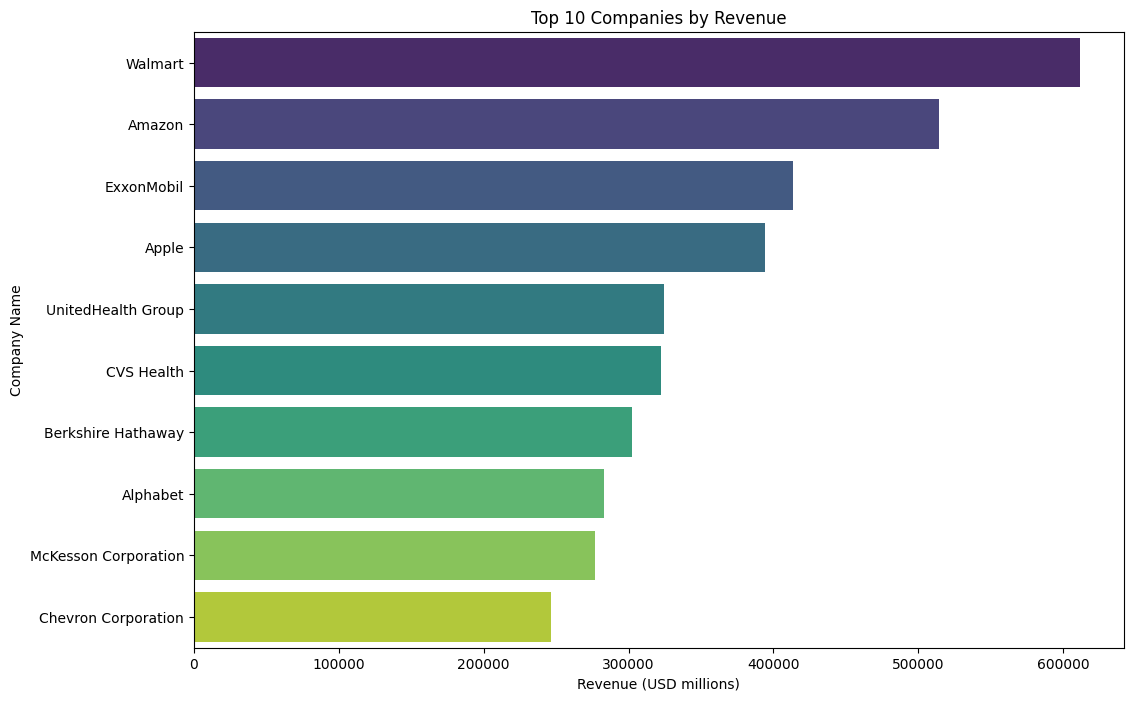

In [18]:
# Bar Plot for Revenue of Top Companiesc

# Sort the DataFrame by revenue in descending order
df_sorted_by_revenue = df.sort_values(by='Revenue (USD millions)', ascending=False)

# Plotting the top 10 companies by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue (USD millions)', y='Name', data=df_sorted_by_revenue.head(10), palette='viridis')
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company Name')
plt.show()

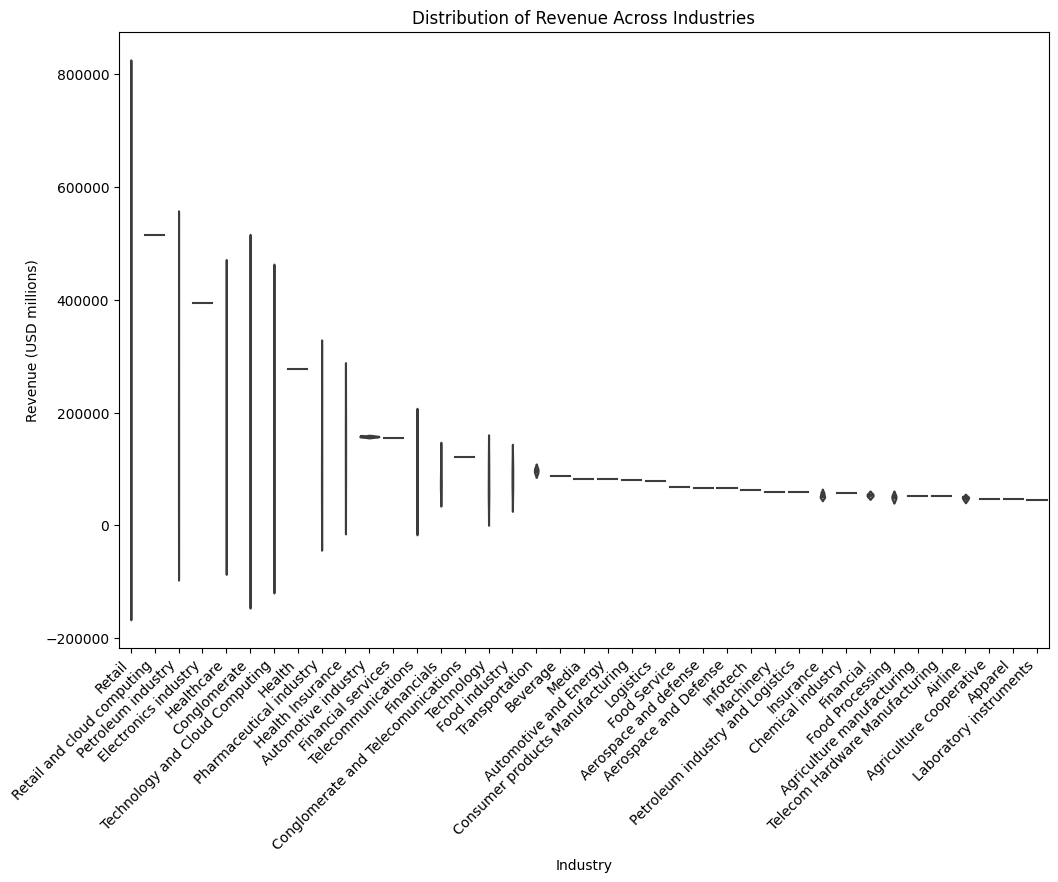

In [19]:
# Box Plot for Revenue Distribution

plt.figure(figsize=(12, 8))
sns.violinplot(x='Industry', y='Revenue (USD millions)', data=df, palette='muted', inner='quartile')
plt.title('Distribution of Revenue Across Industries')
plt.xlabel('Industry')
plt.ylabel('Revenue (USD millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


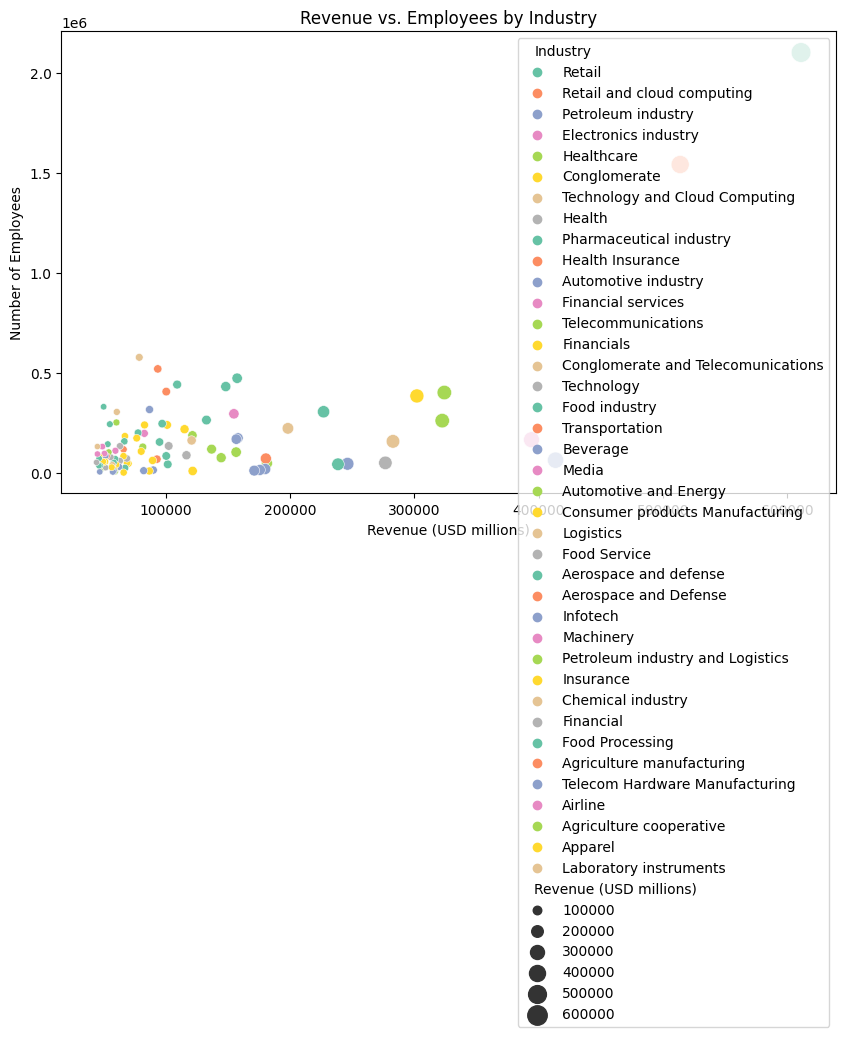

In [20]:
#  Scatter Plot for Revenue vs. Employees

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=df, hue='Industry', palette='Set2', size='Revenue (USD millions)', sizes=(20, 200))
plt.title('Revenue vs. Employees by Industry')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Number of Employees')
plt.show()


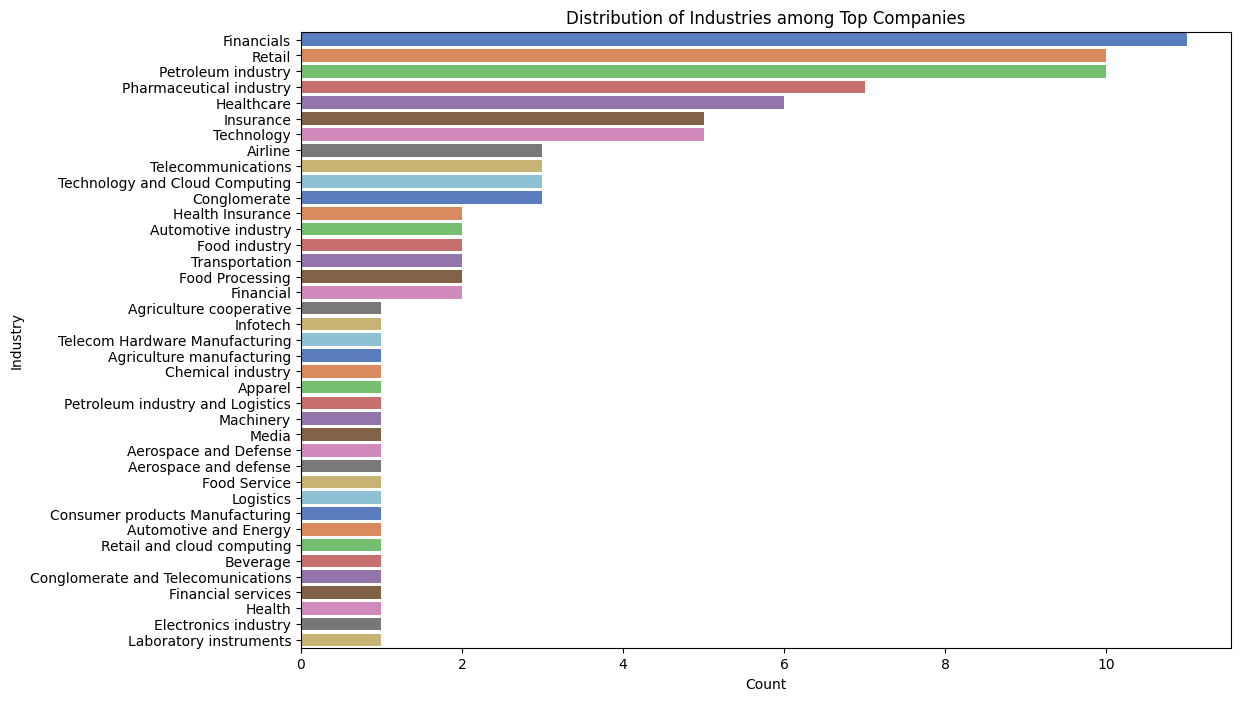

In [21]:
# Bar Plot for Industry Distribution:

plt.figure(figsize=(12, 8))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index, palette='muted')
plt.title('Distribution of Industries among Top Companies')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()
